In [14]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(car)
library(tidyverse)

# Load and clean the dataset,
# Factor education, self_employed,and loan_status
# Change amounts into 100,000s so they're easier to interpret and look cleaner
# Filter to keep only the approved loans, because we'll use only those to make our prediction model, rejected loans 
# are not required
# Remove the columns of loan id and loan status
loan_data <- read.csv("loan_approval_dataset.csv") |>
  mutate(across(c(education, self_employed, loan_status), ~trimws(.)),
         education = factor(education),
         self_employed = factor(self_employed),
         loan_status = factor(loan_status),
         across(c(income_annum, loan_amount, residential_assets_value,
                  commercial_assets_value, luxury_assets_value, bank_asset_value),
                ~ . / 100000)) |>
  filter(loan_status == "Approved") |>
  select(-c(loan_id, loan_status))

# Summary statistics
summary(loan_data)


Warning message:
“package ‘stringr’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ car::recode()   masks dplyr::recode()
✖ purrr::some()   masks car::some()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


 no_of_dependents        education    self_employed  income_annum  
 Min.   :0.000    Graduate    :1339   No :1318      Min.   : 2.00  
 1st Qu.:1.000    Not Graduate:1317   Yes:1338      1st Qu.:26.00  
 Median :2.500                                      Median :50.00  
 Mean   :2.475                                      Mean   :50.26  
 3rd Qu.:4.000                                      3rd Qu.:75.00  
 Max.   :5.000                                      Max.   :99.00  
  loan_amount      loan_term     cibil_score    residential_assets_value
 Min.   :  3.0   Min.   : 2.0   Min.   :300.0   Min.   : -1             
 1st Qu.: 75.0   1st Qu.: 4.0   1st Qu.:618.0   1st Qu.: 21             
 Median :146.0   Median :10.0   Median :711.0   Median : 54             
 Mean   :152.5   Mean   :10.4   Mean   :703.5   Mean   : 74             
 3rd Qu.:221.0   3rd Qu.:16.0   3rd Qu.:803.0   3rd Qu.:112             
 Max.   :395.0   Max.   :20.0   Max.   :900.0   Max.   :291             
 commercial_a

In [15]:
loan_data

no_of_dependents education    self_employed income_annum loan_amount
1    2                Graduate     No            96           299        
2    5                Graduate     No            87           330        
3    0                Graduate     Yes            8            22        
4    4                Graduate     Yes           29           112        
5    2                Graduate     Yes           91           315        
6    5                Not Graduate No            47           107        
7    2                Graduate     Yes            5            16        
8    4                Not Graduate Yes           29            94        
9    2                Graduate     No            27           103        
10   5                Graduate     No            63           146        
11   0                Not Graduate Yes            5            14        
12   4                Graduate     No            82           281        
13   4                Not Graduate Yes           24            56        
14   3                Not Graduate Yes           90           315        
15   5                Not Graduate Yes           84           220        
16   3                Graduate     No            49           119        
17   2                Graduate     Yes           17            34        
18   3                Not Graduate No            16            62        
19   5                Graduate     No            36            77        
20   1                Graduate     No            78           181        
21   2                Not Graduate No            91           249        
22   5                Graduate     No            65           134        
23   3                Not Graduate Yes           42           146        
24   1                Graduate     Yes           49           191        
25   3                Not Graduate No            55           205        
26   1                Not Graduate Yes           95           191        
27   5                Not Graduate No            38            76        
28   1                Not Graduate Yes           84           230        
29   2                Graduate     Yes           51           197        
30   5                Not Graduate No            67           245        
⋮    ⋮                ⋮            ⋮             ⋮            ⋮          
2627 5                Graduate     Yes            8            18        
2628 5                Graduate     Yes           38           103        
2629 5                Graduate     Yes            7            26        
2630 4                Graduate     Yes            4            14        
2631 3                Graduate     No            75           222        
2632 2                Not Graduate No            37           135        
2633 5                Graduate     No            33            91        
2634 1                Graduate     Yes            2             5        
2635 1                Not Graduate No            71           170        
2636 3                Not Graduate Yes           15            51        
2637 0                Not Graduate No            30            65        
2638 0                Not Graduate No            22            75        
2639 1                Graduate     Yes            4             7        
2640 2                Graduate     Yes           56           158        
2641 5                Not Graduate Yes           82           271        
2642 0                Not Graduate Yes           16            34        
2643 3                Not Graduate No            18            56        
2644 5                Not Graduate Yes           65           239        
2645 1                Graduate     Yes           31           115        
2646 3                Not Graduate No            31            98        
2647 4                Graduate     No            11            40        
2648 1                Graduate     Yes           60           134        
2649 0   

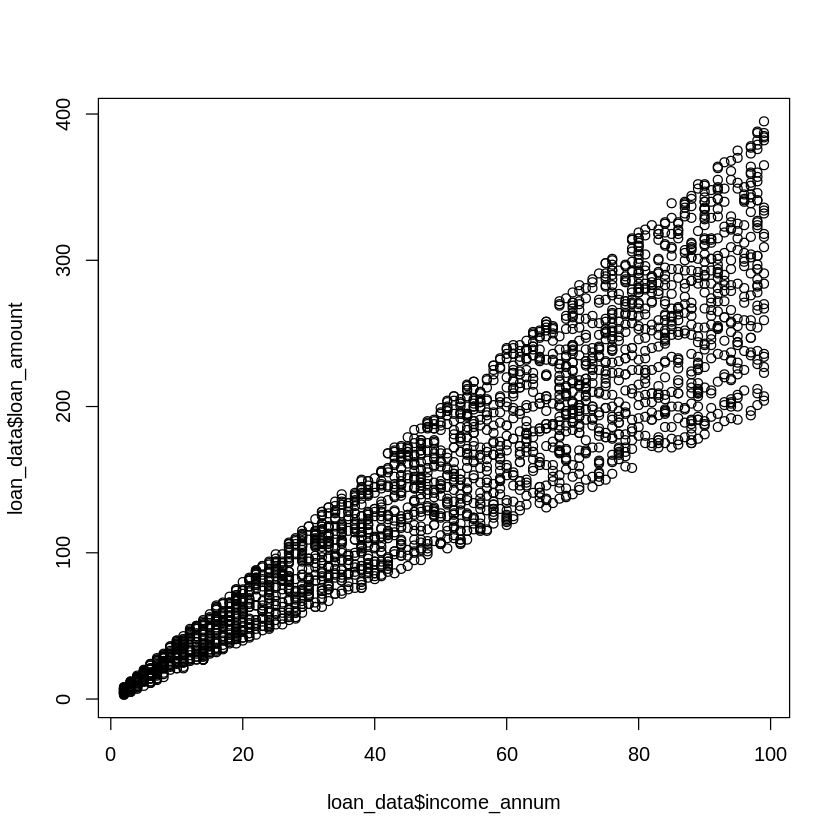

In [16]:
# Plot of income vs loan data
# Need to think of more such plots 
# Also need plots for collinearity of variables, (was there in one of the lectures but idr which)
plot(loan_data$income_annum,loan_data$loan_amount)

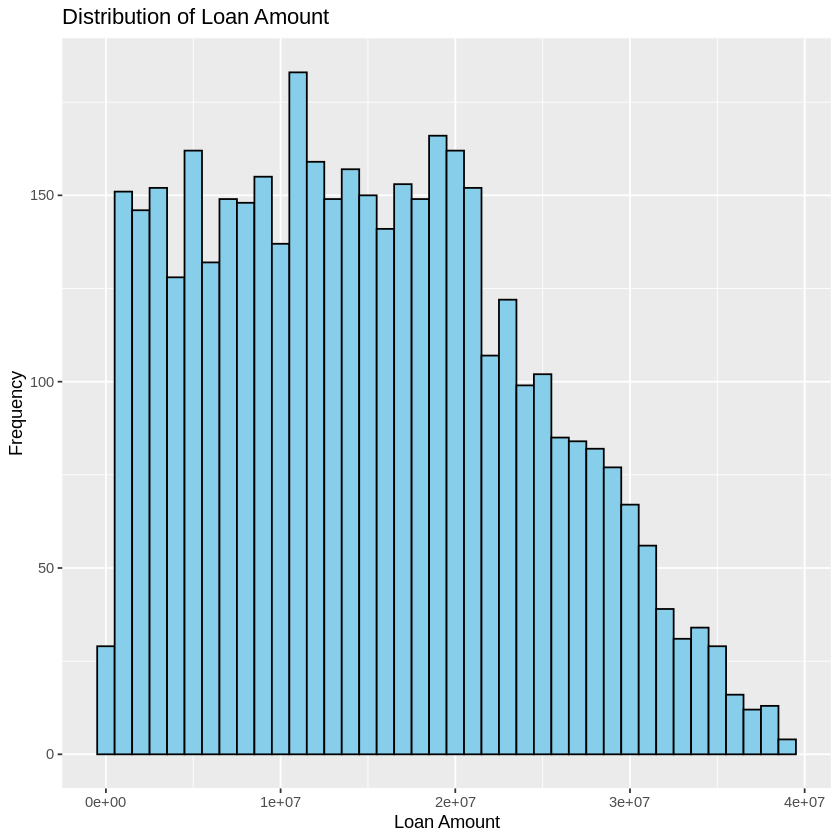

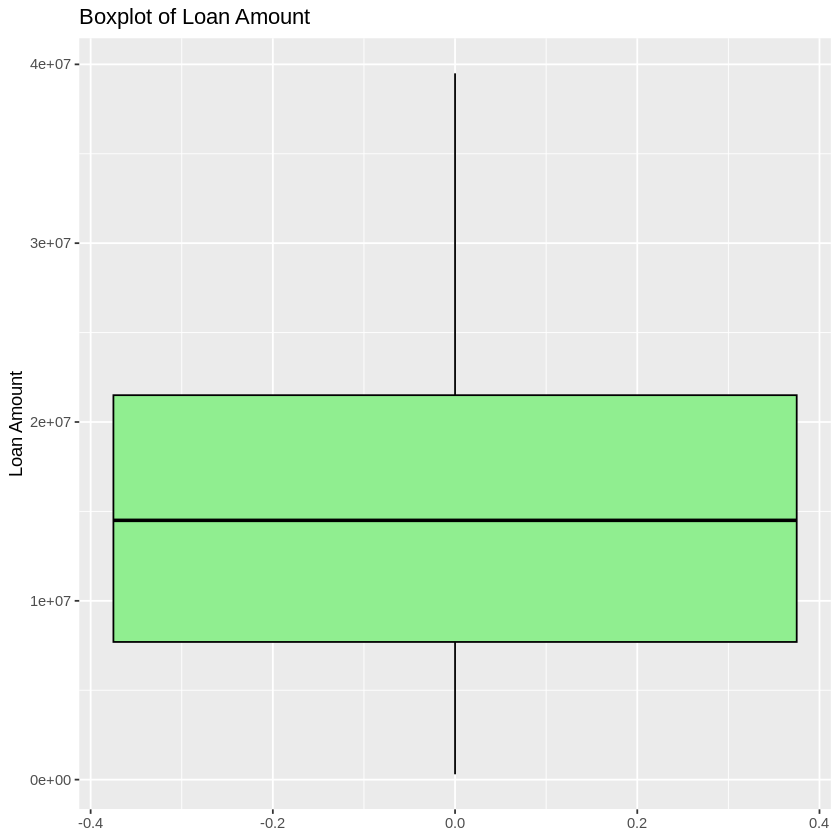

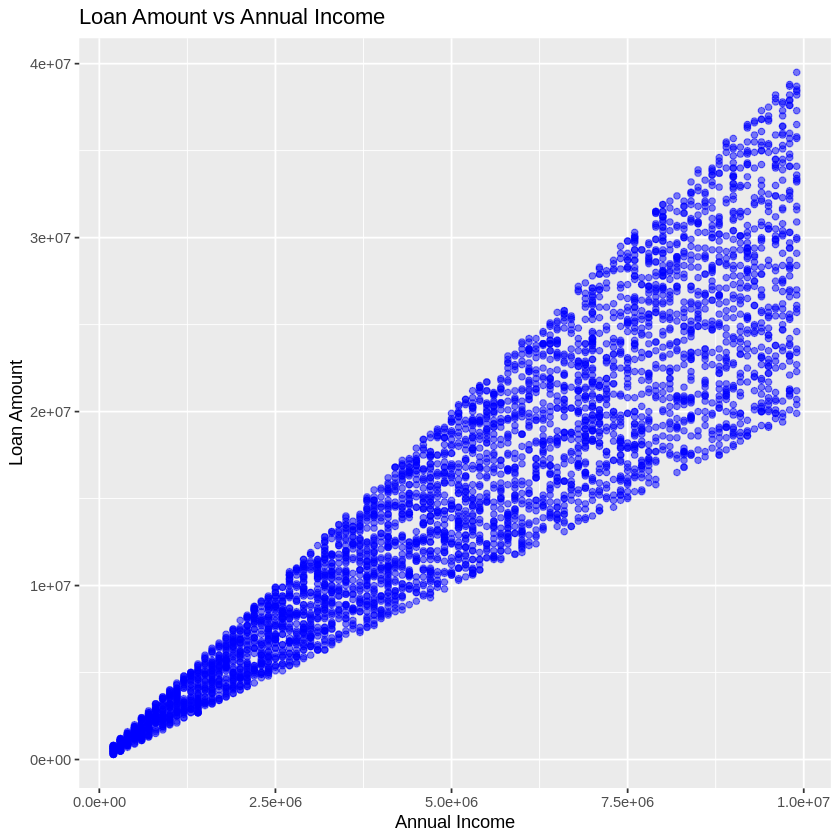

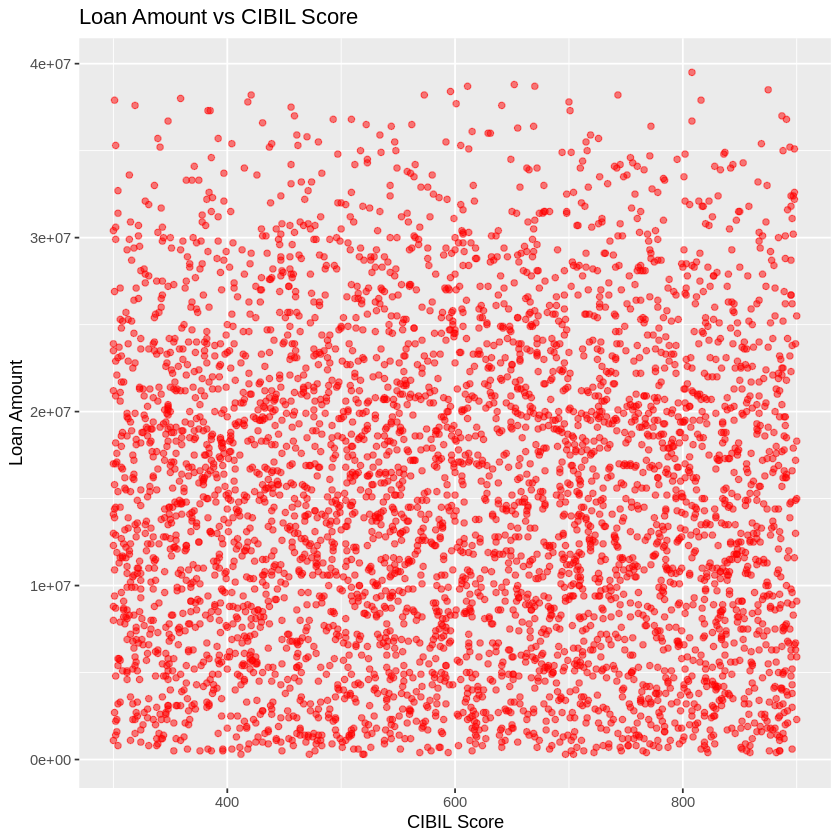

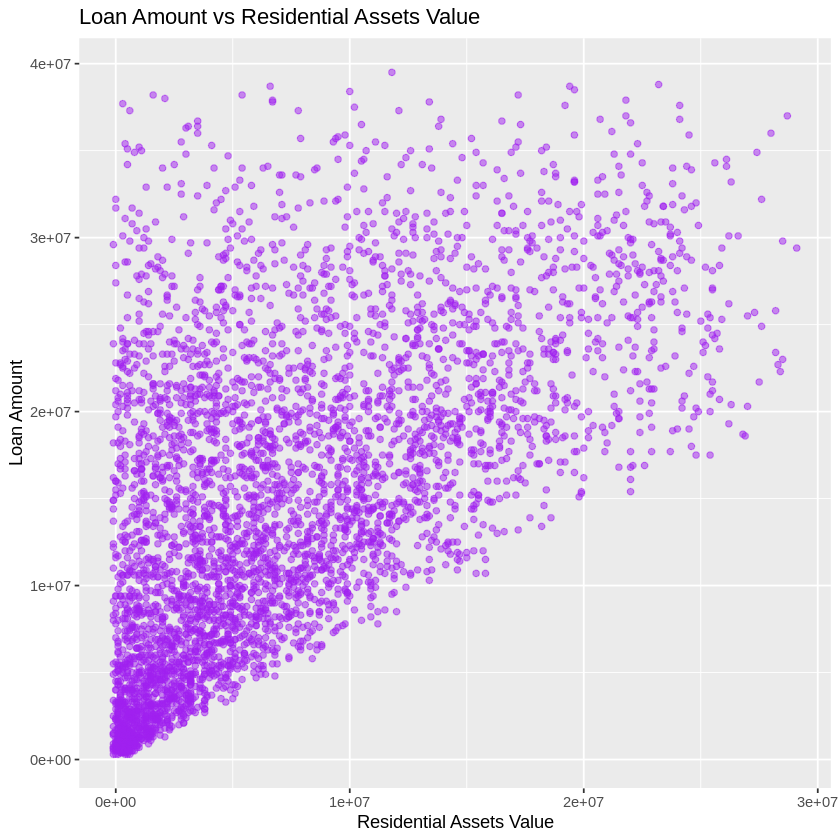

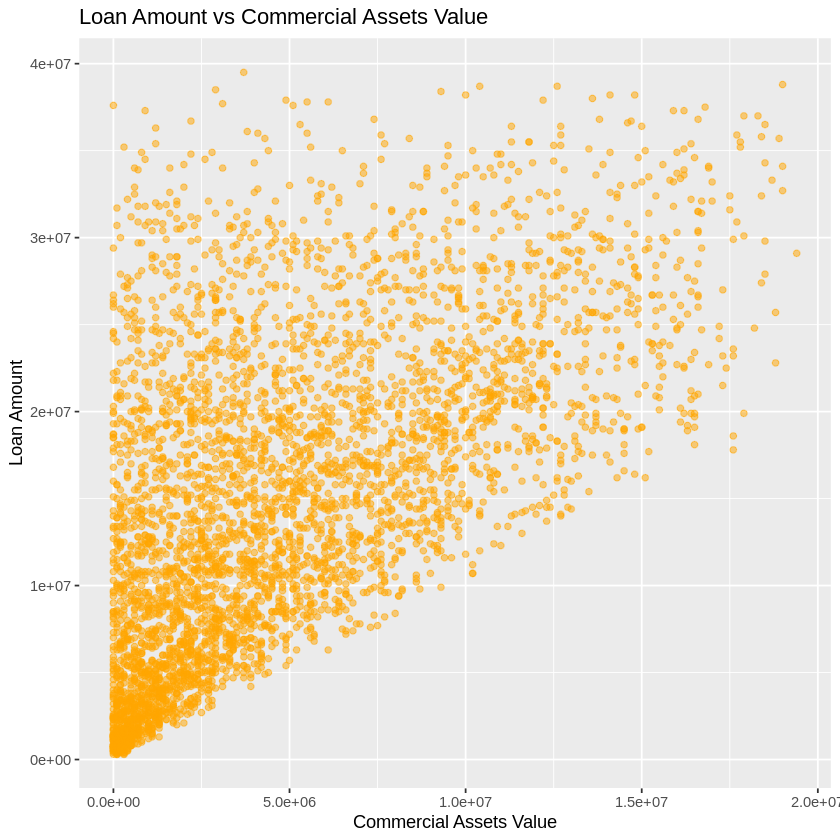

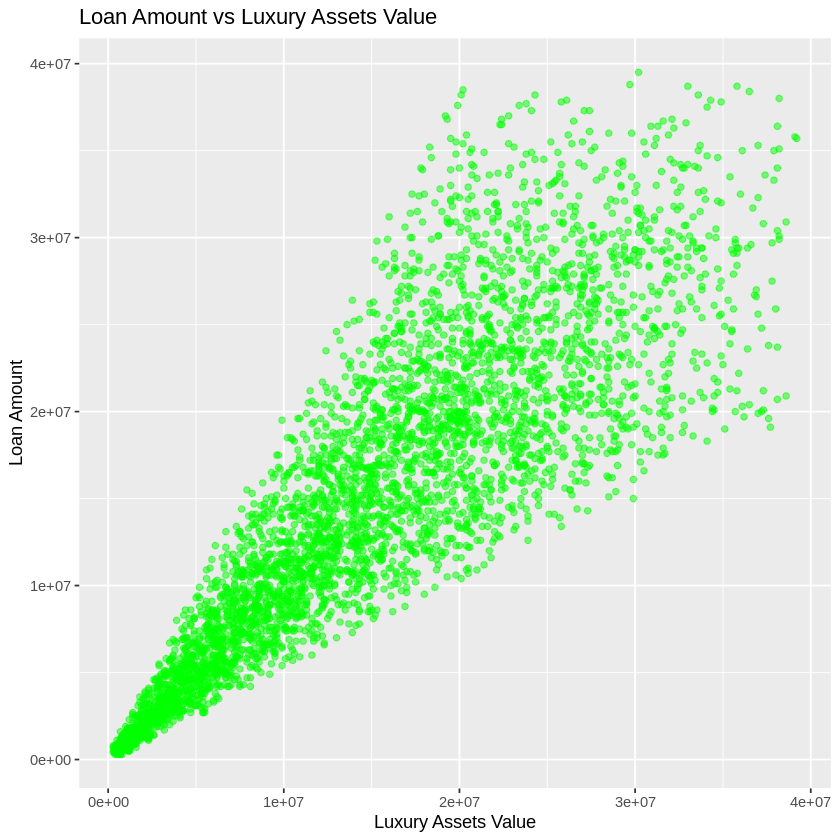

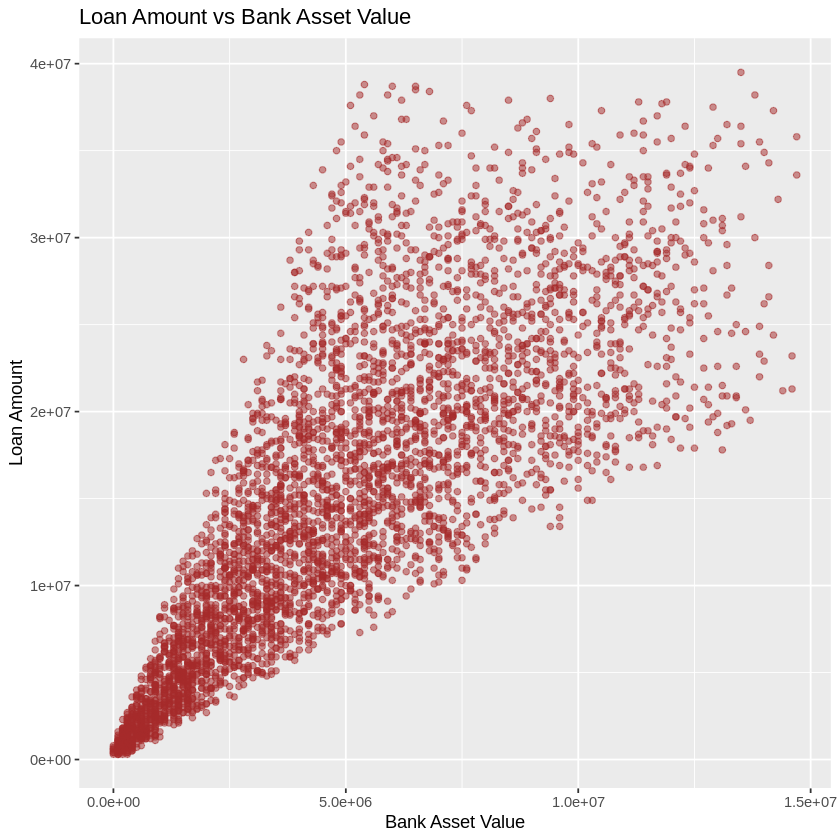

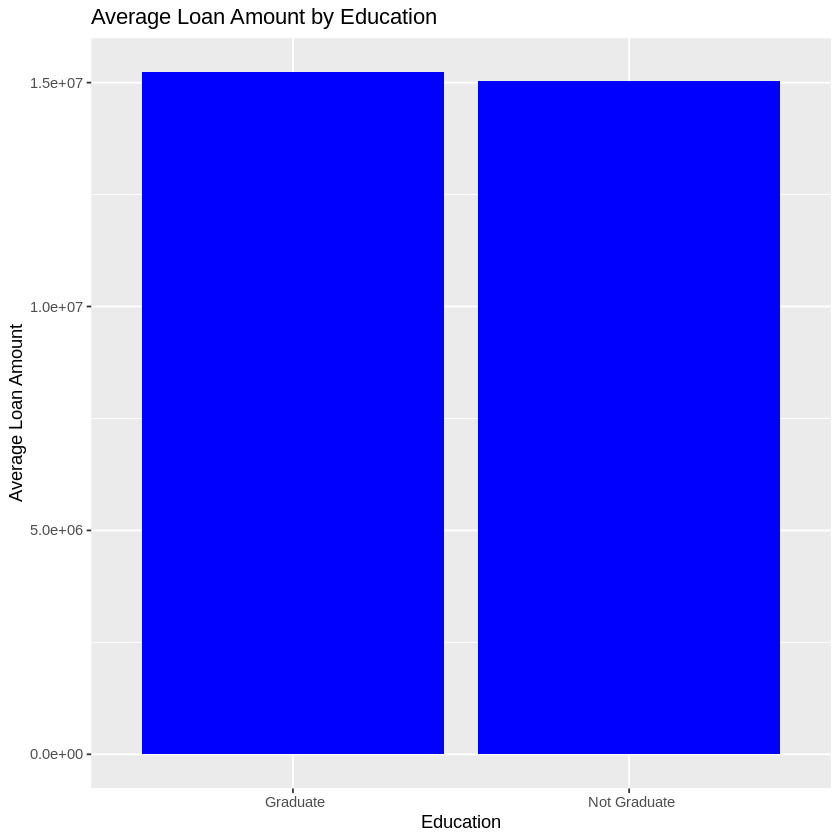

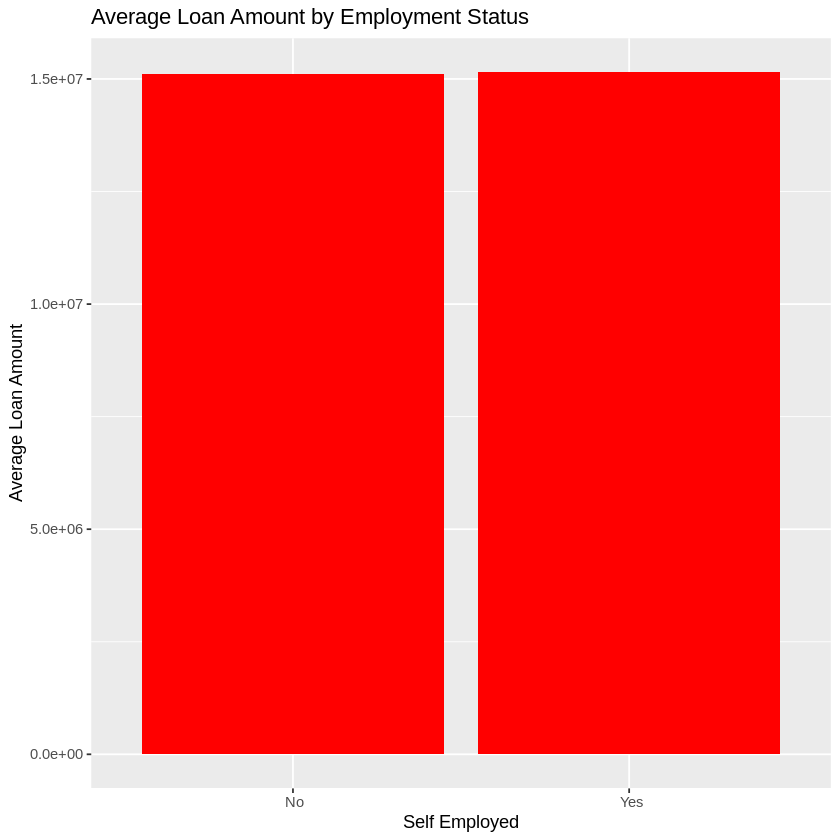

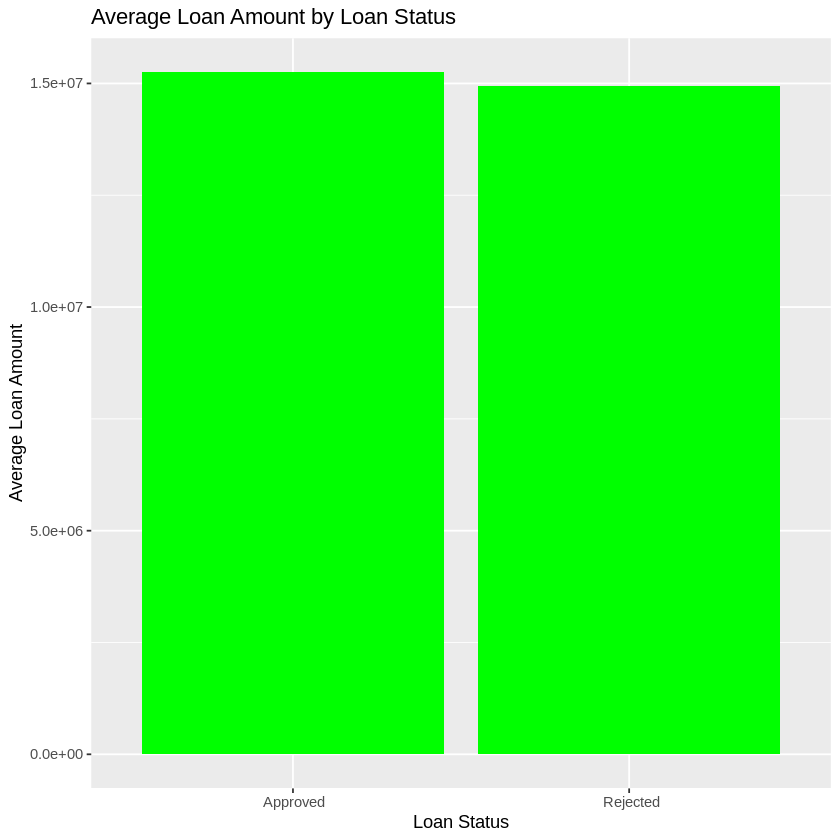

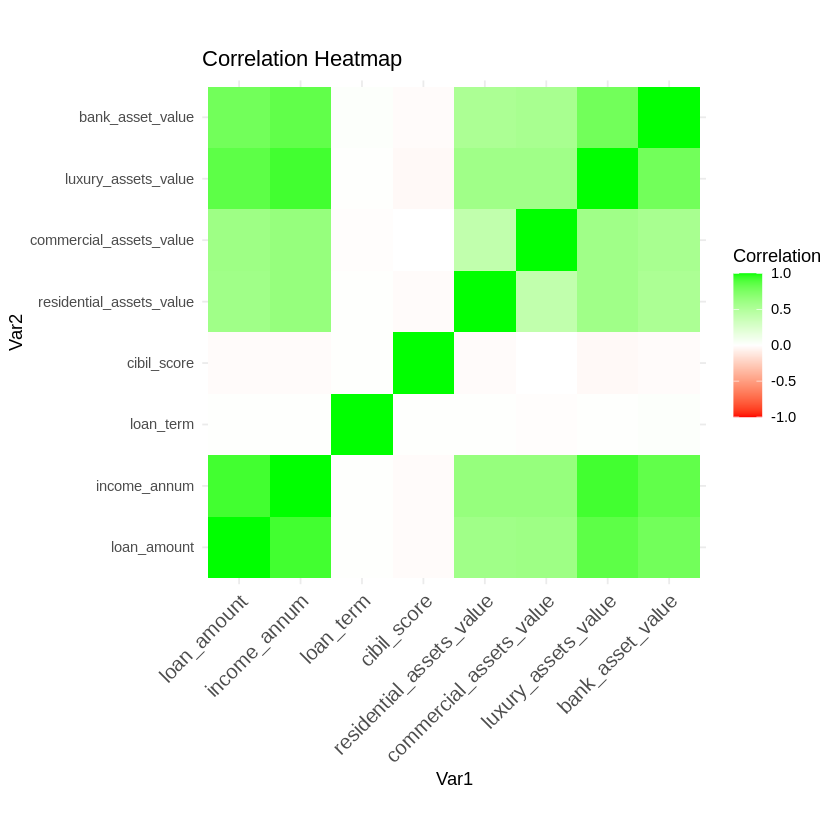

In [58]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Load the dataset
data <- read.csv("loan_approval_dataset.csv")

# Histogram of loan_amount
ggplot(data, aes(x = loan_amount)) +
  geom_histogram(binwidth = 1000000, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Loan Amount", x = "Loan Amount", y = "Frequency")

# Boxplot of loan_amount
ggplot(data, aes(y = loan_amount)) +
  geom_boxplot(fill = "lightgreen", color = "black") +
  labs(title = "Boxplot of Loan Amount", y = "Loan Amount")

# Scatter plot: loan_amount vs income_annum
ggplot(data, aes(x = income_annum, y = loan_amount)) +
  geom_point(color = "blue", alpha = 0.5) +
  labs(title = "Loan Amount vs Annual Income", x = "Annual Income", y = "Loan Amount")

# Scatter plot: loan_amount vs cibil_score
ggplot(data, aes(x = cibil_score, y = loan_amount)) +
  geom_point(color = "red", alpha = 0.5) +
  labs(title = "Loan Amount vs CIBIL Score", x = "CIBIL Score", y = "Loan Amount")

# Scatter plots for loan_amount vs asset values
ggplot(data, aes(x = residential_assets_value, y = loan_amount)) +
  geom_point(color = "purple", alpha = 0.5) +
  labs(title = "Loan Amount vs Residential Assets Value", x = "Residential Assets Value", y = "Loan Amount")

ggplot(data, aes(x = commercial_assets_value, y = loan_amount)) +
  geom_point(color = "orange", alpha = 0.5) +
  labs(title = "Loan Amount vs Commercial Assets Value", x = "Commercial Assets Value", y = "Loan Amount")

ggplot(data, aes(x = luxury_assets_value, y = loan_amount)) +
  geom_point(color = "green", alpha = 0.5) +
  labs(title = "Loan Amount vs Luxury Assets Value", x = "Luxury Assets Value", y = "Loan Amount")

ggplot(data, aes(x = bank_asset_value, y = loan_amount)) +
  geom_point(color = "brown", alpha = 0.5) +
  labs(title = "Loan Amount vs Bank Asset Value", x = "Bank Asset Value", y = "Loan Amount")

# Bar plots for loan_amount by education, self_employed, and loan_status
ggplot(data, aes(x = education, y = loan_amount)) +
  geom_bar(stat = "summary", fun = "mean", fill = "blue") +
  labs(title = "Average Loan Amount by Education", x = "Education", y = "Average Loan Amount")

ggplot(data, aes(x = self_employed, y = loan_amount)) +
  geom_bar(stat = "summary", fun = "mean", fill = "red") +
  labs(title = "Average Loan Amount by Employment Status", x = "Self Employed", y = "Average Loan Amount")

ggplot(data, aes(x = loan_status, y = loan_amount)) +
  geom_bar(stat = "summary", fun = "mean", fill = "green") +
  labs(title = "Average Loan Amount by Loan Status", x = "Loan Status", y = "Average Loan Amount")

# Correlation heatmap for numeric variables
library(reshape2)
corr_data <- data %>% select(loan_amount, income_annum, loan_term, cibil_score,
                             residential_assets_value, commercial_assets_value,
                             luxury_assets_value, bank_asset_value)

corr_matrix <- round(cor(corr_data), 2)
melted_corr <- melt(corr_matrix)

ggplot(data = melted_corr, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "red", high = "green", mid = "white", 
                       midpoint = 0, limit = c(-1,1), space = "Lab", 
                       name="Correlation") +
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1)) +
  coord_fixed() +
  labs(title = "Correlation Heatmap")


In [21]:
# Full model including all the variables
full_model<-lm(loan_amount~.,data=loan_data)
summary(full_model)


Call:
lm(formula = loan_amount ~ ., data = loan_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.395 -18.153   0.171  19.698  99.118 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              26.468960   4.060459   6.519 8.46e-11 ***
no_of_dependents         -0.610683   0.379292  -1.610   0.1075    
educationNot Graduate    -0.464121   1.285379  -0.361   0.7181    
self_employedYes         -0.131761   1.286044  -0.102   0.9184    
income_annum              2.934869   0.078605  37.337  < 2e-16 ***
loan_term                -0.248972   0.111818  -2.227   0.0261 *  
cibil_score              -0.031683   0.005249  -6.036 1.80e-09 ***
residential_assets_value  0.007954   0.012794   0.622   0.5342    
commercial_assets_value   0.049574   0.019493   2.543   0.0110 *  
luxury_assets_value       0.003205   0.019054   0.168   0.8664    
bank_asset_value          0.032963   0.037911   0.869   0.3847    
---
Signif. codes:  0 ‘***’ 0.00

In [22]:
# VIF values of full model, shows high values of income, luxry assets, suggests there may be collinearity
vif(full_model)

no_of_dependents                education            self_employed 
                1.002766                 1.002100                 1.003148 
            income_annum                loan_term              cibil_score 
               11.978232                 1.048285                 1.048272 
residential_assets_value  commercial_assets_value      luxury_assets_value 
                1.677942                 1.776701                 7.378797 
        bank_asset_value 
                3.735757

In [23]:
#Model that takes the average of the assets value, since they're likely to be correlated. 
# Changes 4 variables into 1 variable
model_1<-lm(loan_amount~no_of_dependents+education+self_employed+income_annum+loan_term+cibil_score
            +I(rowMeans(cbind(residential_assets_value,
                              commercial_assets_value,luxury_assets_value,bank_asset_value))),data=loan_data)
summary(model_1)


Call:
lm(formula = loan_amount ~ no_of_dependents + education + self_employed + 
    income_annum + loan_term + cibil_score + I(rowMeans(cbind(residential_assets_value, 
    commercial_assets_value, luxury_assets_value, bank_asset_value))), 
    data = loan_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-99.772 -18.342   0.233  19.425  97.881 

Coefficients:
                                                                                                              Estimate
(Intercept)                                                                                                  26.363703
no_of_dependents                                                                                             -0.624923
educationNot Graduate                                                                                        -0.428302
self_employedYes                                                                                             -0.217778
income_annum                   

In [24]:
#Still there are high VIF value for income and assets value, suggests that they're correlated.
# Logically makes sense, higher income would have more assets
vif(model_1)

no_of_dependents 
                                                                                                    1.001737 
                                                                                                   education 
                                                                                                    1.001781 
                                                                                               self_employed 
                                                                                                    1.001997 
                                                                                                income_annum 
                                                                                                    7.771831 
                                                                                                   loan_term 
                                                                                                    1.047510 
                                                                                                 cibil_score 
                                                                                                    1.046510 
I(rowMeans(cbind(residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value))) 
                                                                                                    7.774906

In [25]:
# Remove the assets variable to see if it solves collinearity issue
model_2<-lm(loan_amount~no_of_dependents+education+self_employed+income_annum+loan_term+cibil_score,data=loan_data)
summary(model_2)


Call:
lm(formula = loan_amount ~ no_of_dependents + education + self_employed + 
    income_annum + loan_term + cibil_score, data = loan_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-100.165  -17.879    0.238   19.499   97.083 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           26.426662   4.061199   6.507 9.13e-11 ***
no_of_dependents      -0.617758   0.379353  -1.628   0.1035    
educationNot Graduate -0.462188   1.285983  -0.359   0.7193    
self_employedYes      -0.282722   1.285789  -0.220   0.8260    
income_annum           3.039452   0.022747 133.621  < 2e-16 ***
loan_term             -0.247170   0.111850  -2.210   0.0272 *  
cibil_score           -0.031620   0.005248  -6.025 1.92e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33.11 on 2649 degrees of freedom
Multiple R-squared:  0.8714,	Adjusted R-squared:  0.8711 
F-statistic:  2991 on 6 and 2649 DF,  p-v

In [26]:
#Small VIF values, collinearity looks to be resolved
vif(model_2)

no_of_dependents        education    self_employed     income_annum 
        1.001640         1.001591         1.001302         1.001628 
       loan_term      cibil_score 
        1.047373         1.046339

In [27]:
library(leaps)

# Perform exhaustive search to find best model for each number of parameter
model_subsets <- regsubsets(loan_amount ~ no_of_dependents+education+self_employed+income_annum+loan_term+cibil_score, data = loan_data)
model_summary <- summary(model_subsets)

# Output the summary$which
model_summary$which

# Plot Mallows' Cp
plot(model_summary$cp, xlab = "Number of Parameters", ylab = "Mallows' Cp", type = "b")
abline(0, 1, col = "red")

#Best model looks like one with 3 variables: income, loan term, and cibil score. Has mallow's cp close to its
# number of parameters while having low number of parameters.

ERROR: Error in library(leaps): there is no package called ‘leaps’


In [28]:
# Model selected from above
model_best<-lm(loan_amount~income_annum+cibil_score+loan_term,data=loan_data)
summary(model_best)

# All parameters are statistically significant which suggests we're on the right track


Call:
lm(formula = loan_amount ~ income_annum + cibil_score + loan_term, 
    data = loan_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-100.383  -18.170    0.317   19.564   98.096 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  24.637829   3.874480   6.359 2.38e-10 ***
income_annum  3.039545   0.022745 133.637  < 2e-16 ***
cibil_score  -0.031857   0.005245  -6.074 1.43e-09 ***
loan_term    -0.242348   0.111764  -2.168   0.0302 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33.11 on 2652 degrees of freedom
Multiple R-squared:  0.8712,	Adjusted R-squared:  0.8711 
F-statistic:  5981 on 3 and 2652 DF,  p-value: < 2.2e-16


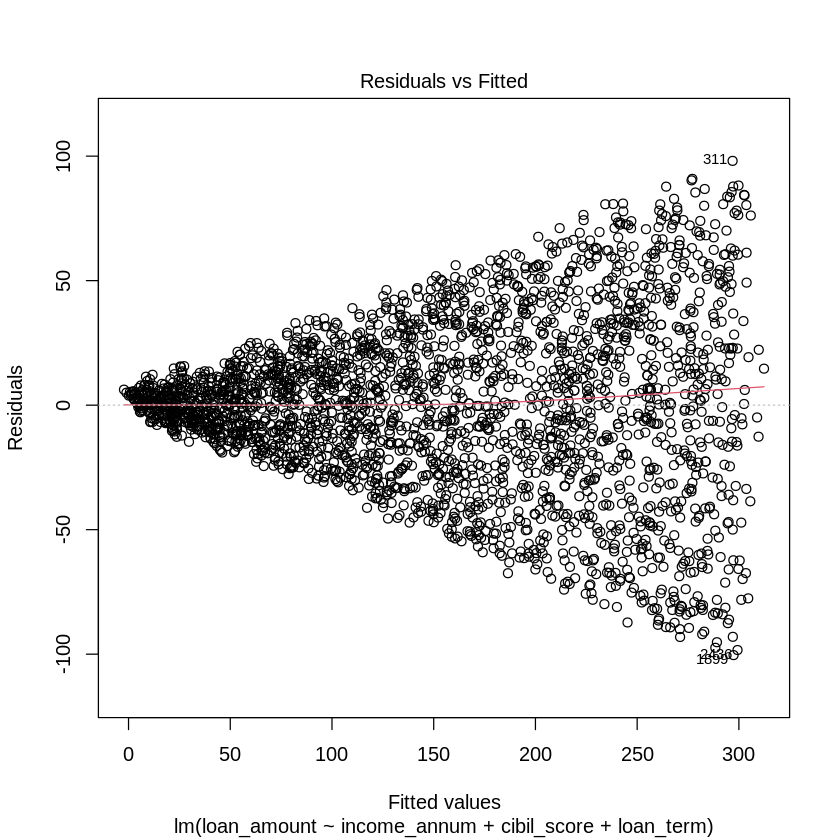

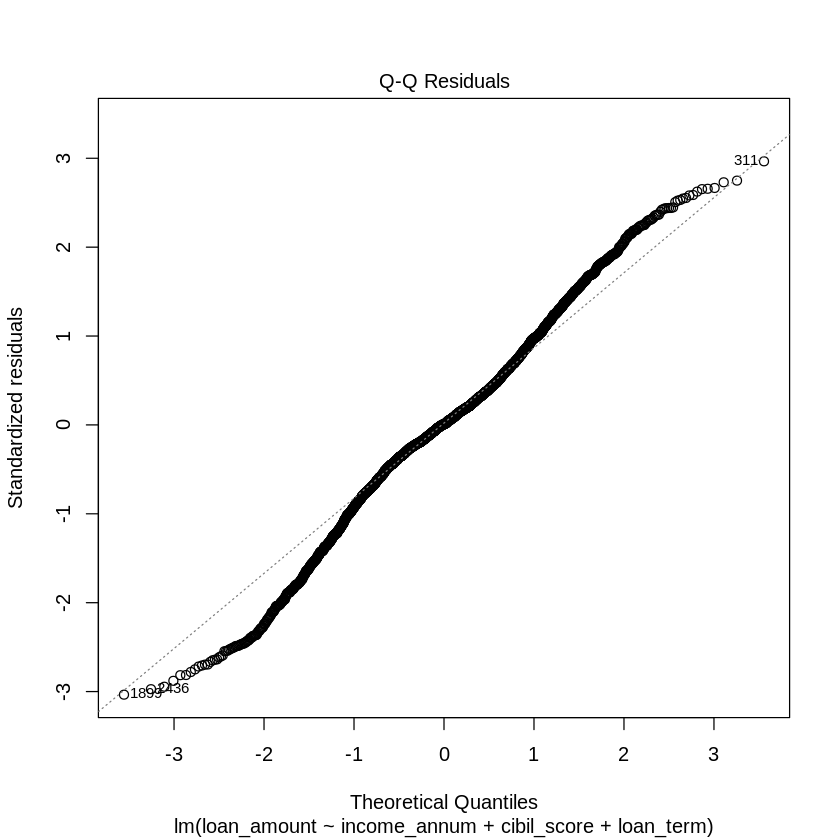

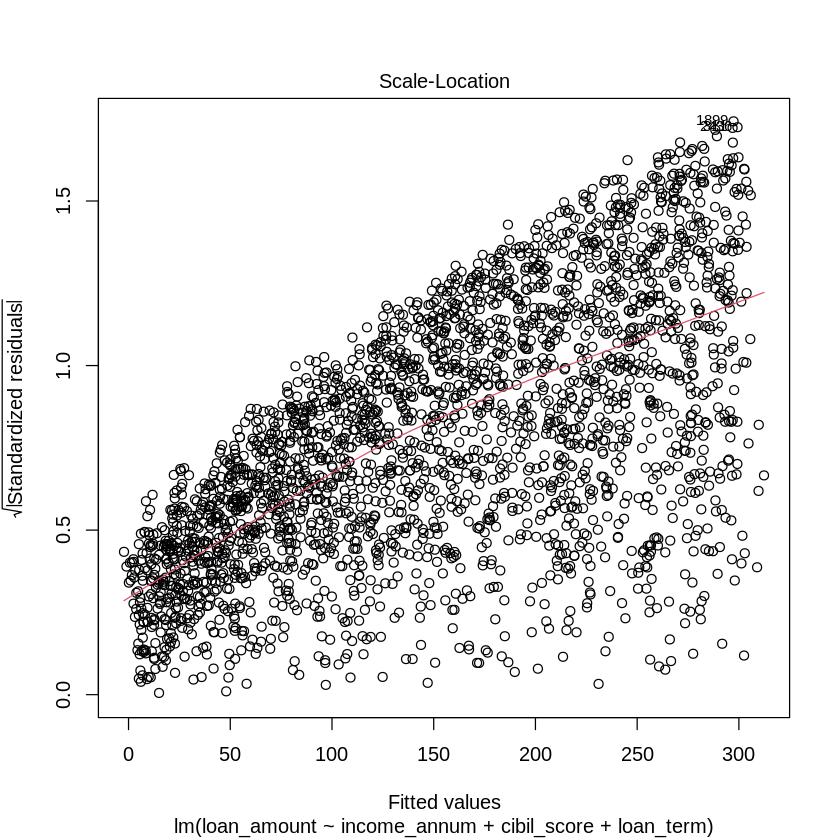

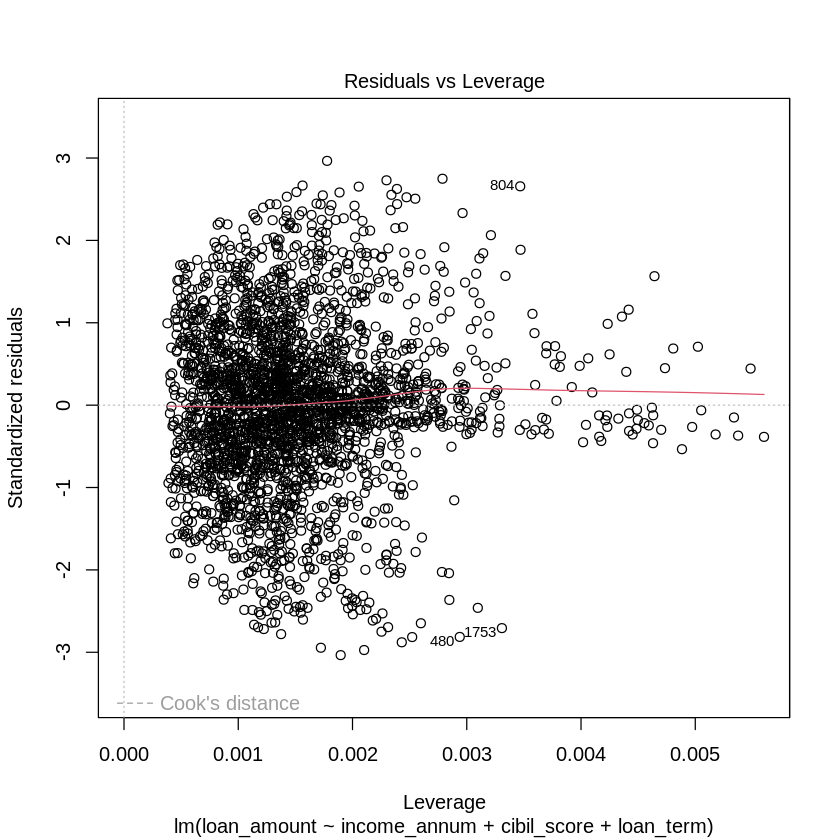

In [29]:
# Residual plots shows non-constant variance (heteroscedasticity)
plot(model_best)

In [30]:
# One method to tackle this is taking the log of the response (loan amount), so let's try that
model_log<-lm(I(sqrt(loan_amount))~income_annum+cibil_score+loan_term,data=loan_data)
summary(model_log)


Call:
lm(formula = I(sqrt(loan_amount)) ~ income_annum + cibil_score + 
    loan_term, data = loan_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1073 -0.9632  0.0617  1.1073  2.6725 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.7146963  0.1626445  35.136  < 2e-16 ***
income_annum  0.1369971  0.0009548 143.484  < 2e-16 ***
cibil_score  -0.0012524  0.0002202  -5.688 1.42e-08 ***
loan_term    -0.0075227  0.0046917  -1.603    0.109    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.39 on 2652 degrees of freedom
Multiple R-squared:  0.8863,	Adjusted R-squared:  0.8862 
F-statistic:  6891 on 3 and 2652 DF,  p-value: < 2.2e-16


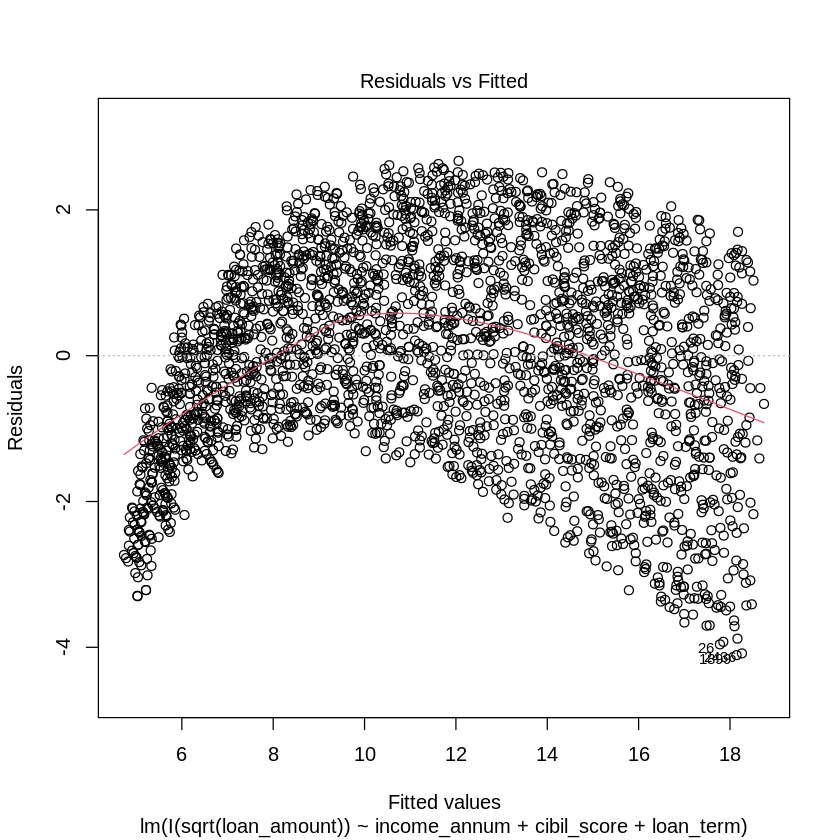

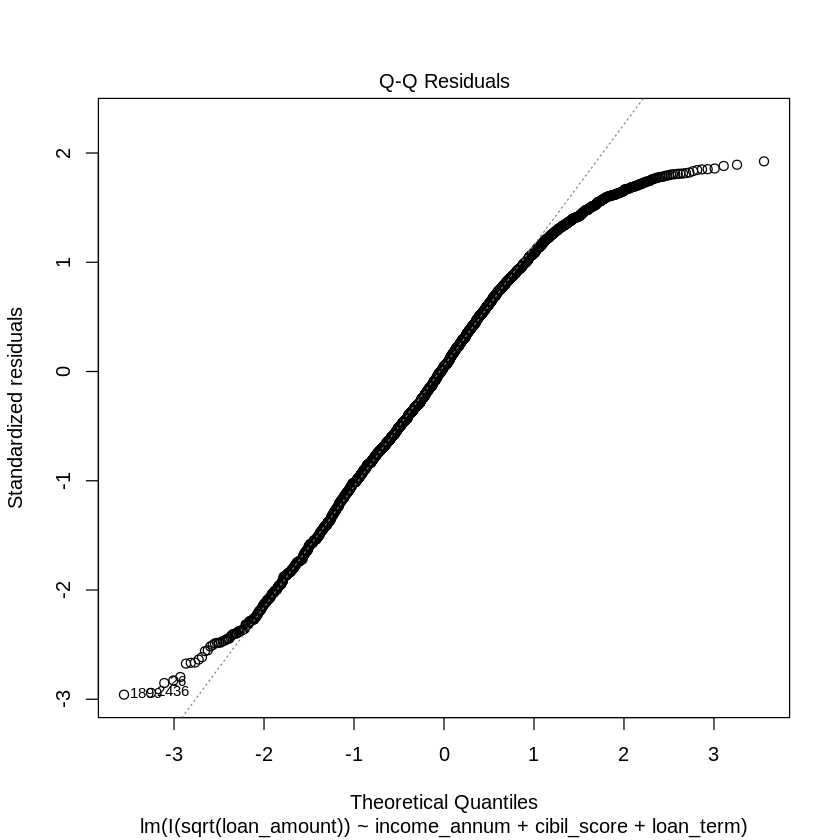

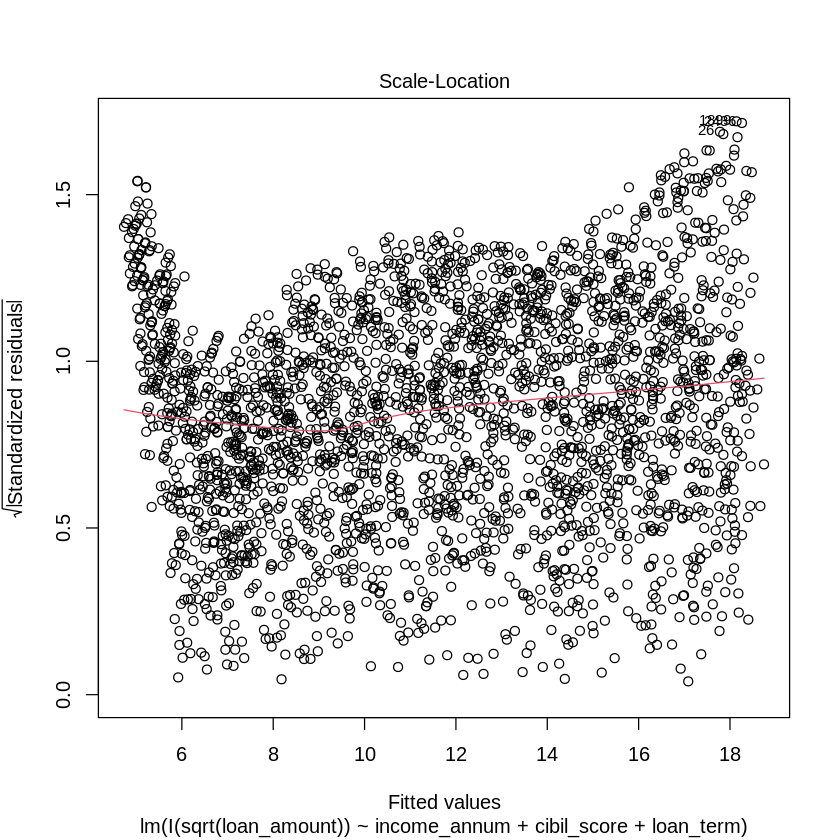

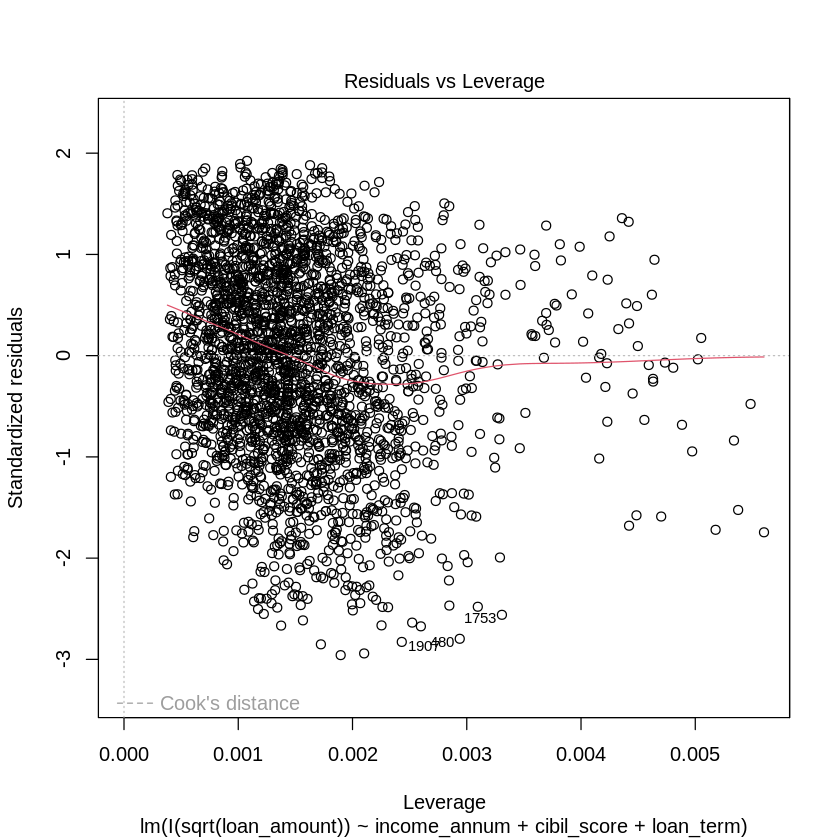

In [31]:
# Residuals show a pattern so even this model doesn't work
plot(model_log)

In [32]:
# Lets try taking the log of both the loan amount and the income.
model_log_twice<-lm(I(log(loan_amount))~I(log(income_annum))+cibil_score+loan_term,data=loan_data)
summary(model_log_twice)

# We get the highest R^2 and adjusted R^2 value achieved till now so that's another positive


Call:
lm(formula = I(log(loan_amount)) ~ I(log(income_annum)) + cibil_score + 
    loan_term, data = loan_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.65191 -0.15670  0.02862  0.17216  0.36967 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.242e+00  2.795e-02  44.454  < 2e-16 ***
I(log(income_annum))  1.010e+00  4.537e-03 222.615  < 2e-16 ***
cibil_score          -2.564e-04  3.186e-05  -8.047 1.27e-15 ***
loan_term            -1.145e-03  6.789e-04  -1.686   0.0919 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2011 on 2652 degrees of freedom
Multiple R-squared:  0.9493,	Adjusted R-squared:  0.9493 
F-statistic: 1.657e+04 on 3 and 2652 DF,  p-value: < 2.2e-16


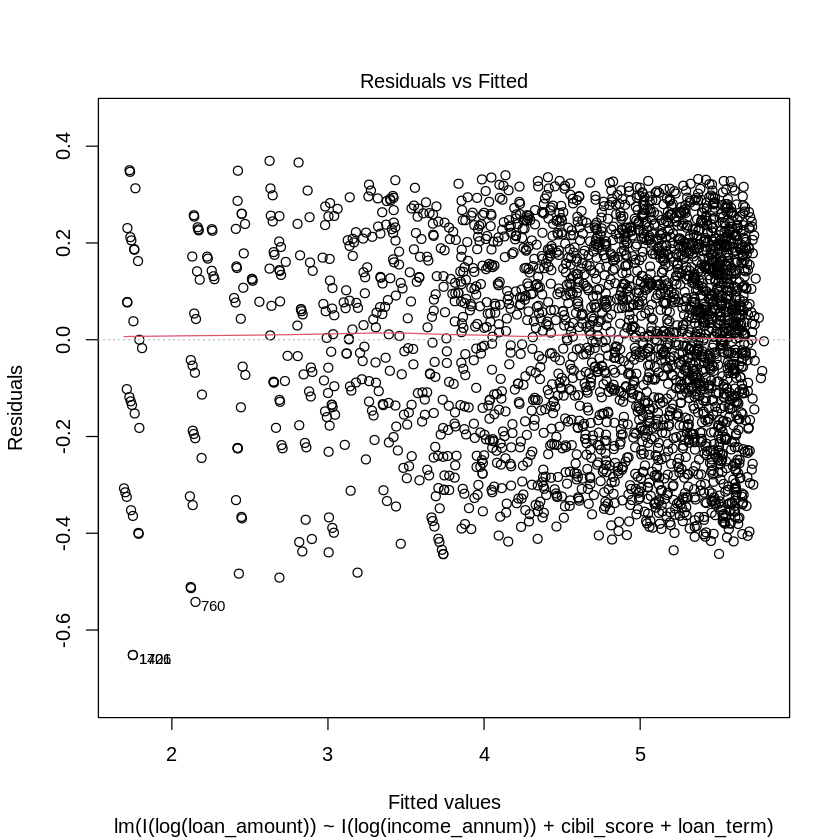

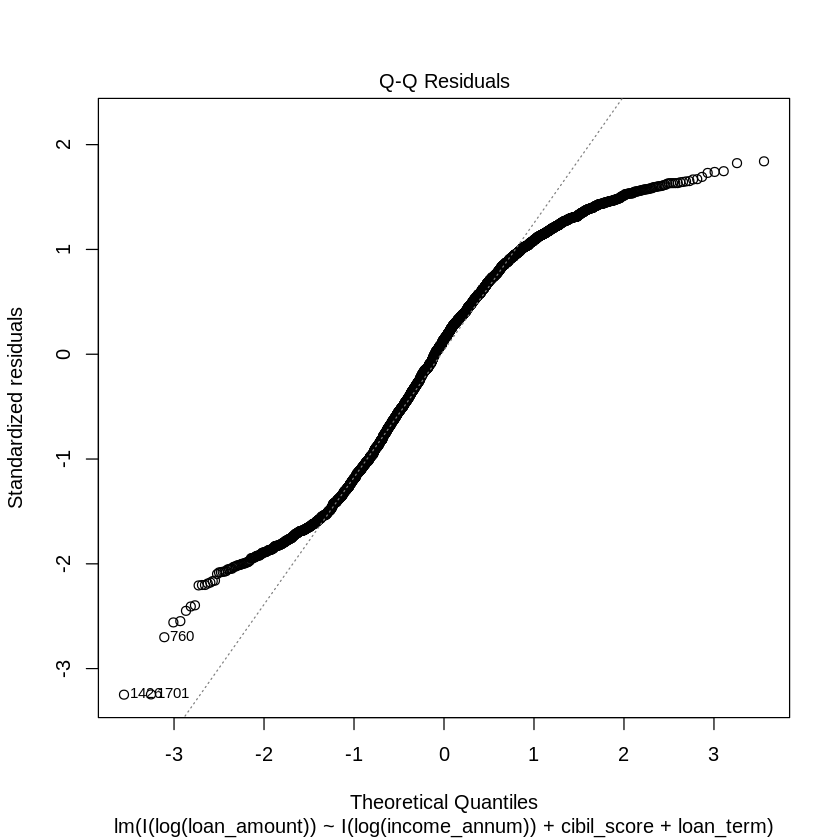

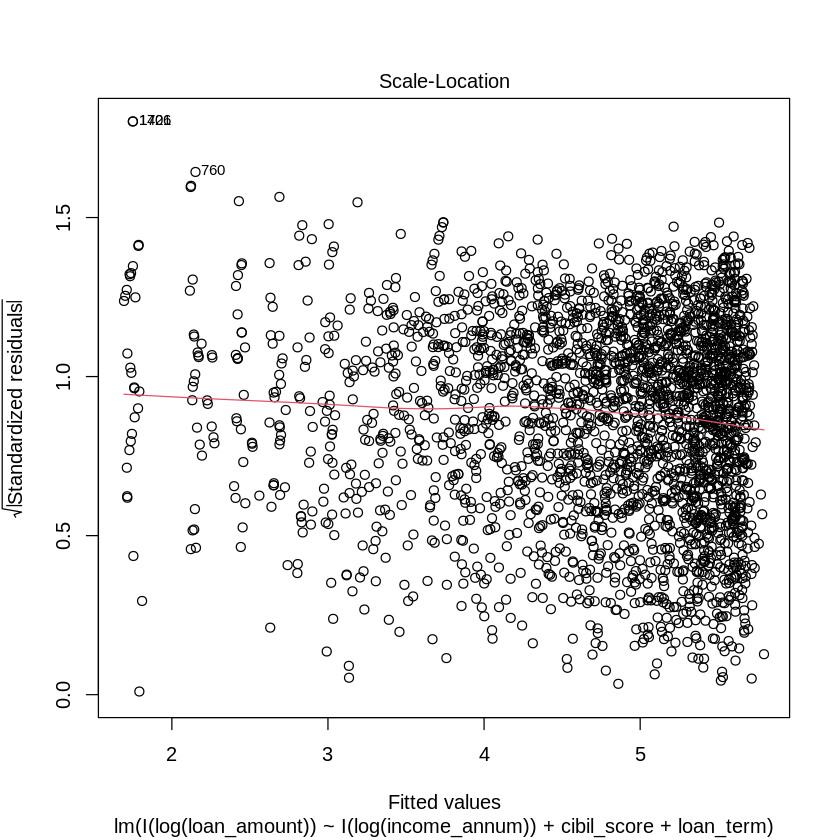

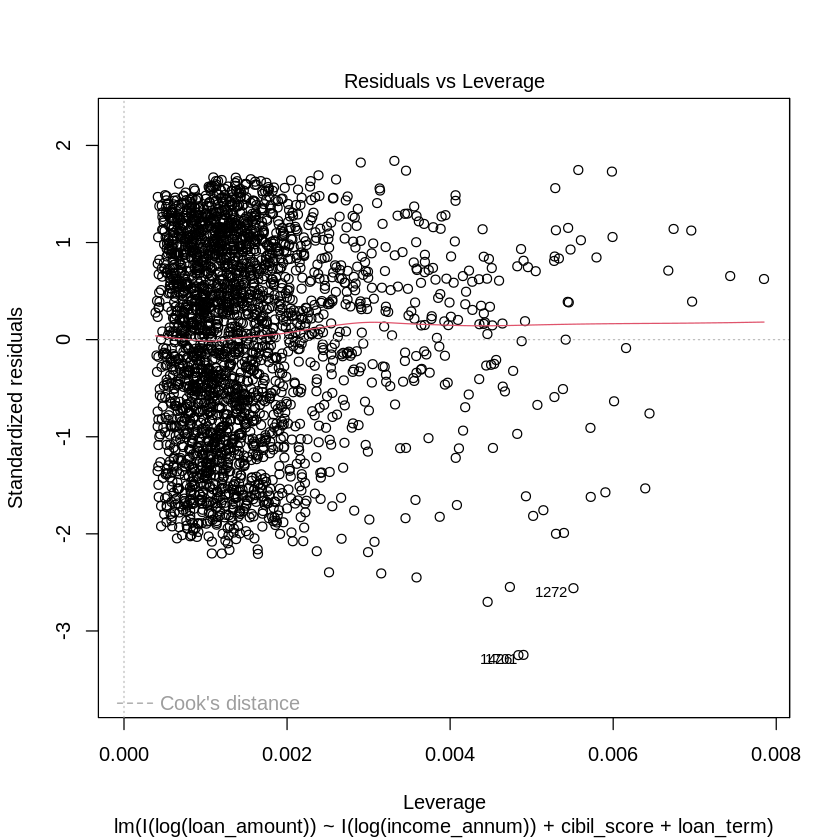

In [33]:
# Residual plot looks good. Problem of heteroscedasticity looks to be resolved. It's also patternless around 0
plot(model_log_twice)

In [34]:
# Split data into training and holdout sets
set.seed(5882)
ss <- sample.int(nrow(loan_data), size = 2134) 
train_set <- loan_data[ss, ]
holdout_set <- loan_data[-ss, ] 
summary(train_set)

 no_of_dependents        education    self_employed  income_annum  
 Min.   :0.000    Graduate    :1058   No :1040      Min.   : 2.00  
 1st Qu.:1.000    Not Graduate:1076   Yes:1094      1st Qu.:26.00  
 Median :2.000                                      Median :49.00  
 Mean   :2.484                                      Mean   :49.71  
 3rd Qu.:4.000                                      3rd Qu.:74.00  
 Max.   :5.000                                      Max.   :99.00  
  loan_amount      loan_term      cibil_score    residential_assets_value
 Min.   :  3.0   Min.   : 2.00   Min.   :300.0   Min.   : -1.0           
 1st Qu.: 74.0   1st Qu.: 4.00   1st Qu.:618.0   1st Qu.: 20.0           
 Median :143.5   Median :10.00   Median :711.5   Median : 53.0           
 Mean   :150.3   Mean   :10.44   Mean   :704.5   Mean   : 73.3           
 3rd Qu.:216.0   3rd Qu.:16.00   3rd Qu.:804.0   3rd Qu.:110.8           
 Max.   :395.0   Max.   :20.00   Max.   :900.0   Max.   :291.0           
 comme

In [35]:
# Fit the full model to the training set
full_model_train <- lm(loan_amount~no_of_dependents+education+self_employed+
                       income_annum+loan_term+cibil_score,data=train_set)

# Predict the responses for the holdout set
pred_full_holdout <- predict(full_model_train, newdata = holdout_set)

# Compute the RMSE
rmse <- function(u, v) sqrt(mean((u - v)^2))
rmse_full <- rmse(pred_full_holdout, holdout_set$loan_amount)


# Fit the full model to the holdout set
full_model_holdout <- lm(loan_amount~no_of_dependents+education+self_employed+
                       income_annum+loan_term+cibil_score,data=holdout_set)

# Predict the responses for the training set
pred_full_train <- predict(full_model_holdout, newdata = train_set)

# Compute the RMSE
rmse_full_2 <- rmse(pred_full_train, train_set$loan_amount)


# Average RMSE for the full model
avg_rmse_full <- mean(c(rmse_full, rmse_full_2))
avg_rmse_full

# Fit the reduced model to the training set
reduced_model_train <- lm(I(log(loan_amount))~I(log(income_annum))+cibil_score+loan_term,data=train_set)

# Predict the responses for the holdout set
pred_reduced_holdout <- exp(predict(reduced_model_train, newdata = holdout_set))

# Compute the RMSE
rmse_reduced <- rmse(pred_reduced_holdout, holdout_set$loan_amount)


# Fit the reduced model to the holdout set
reduced_model_holdout <- lm(I(log(loan_amount))~I(log(income_annum))+cibil_score+loan_term,data=holdout_set)

# Predict the responses for the training set
pred_reduced_train <- exp(predict(reduced_model_holdout, newdata = train_set))

# Compute the RMSE
rmse_reduced_2 <- rmse(pred_reduced_train, train_set$loan_amount)


# Average RMSE for the reduced model
avg_rmse_reduced <- mean(c(rmse_reduced, rmse_reduced_2))
avg_rmse_reduced

[1] 33.44718

[1] 33.49853

In [36]:
# There's not really much we can do or show in this splitting into training sets and finding rmse.
# I'm not sure what else can be done here. I think we should not include at all, and focus more on the model selection
# we do earlier, using R^2, and Mallow's cp, and residuals plots and stuff. 

# Our feedback for the proposal also had this point of Inference vs Prediction. What we did earlier would be inference
# since we're trying to see which model is best, and understand the coefficients, and stuff.
# Train and holdout sets will be prediction, so anyways we have to choose one and focus so I suggest we focus on 
# Inference and leave prediction entirely. It will give us more content and adhere to the feedback and expectations
# of the grader. 

# So, I think next steps will be first, go over what I've done just to see if I've not make a big mistake, or there's a
# flaw in my logic somewhere while dealing with collinearity and heteroscedasticity. 
# Next, see what else can we include, or how to refine the flow and progression of how we decide models and eliminate others
# The final interpretation of the final model selected in some way also could be explored
# We also need more relevant data exploration plots, now that we know what we are doing ahead, we can forge new plots 
# that would be useful ahead